In [ ]:
from numpy.random import default_rng

import matplotlib.pyplot as plt

import scanpy as sc
import squidpy as sq
from anndata import AnnData

sc.logging.print_header()
print(f"squidpy=={sq.__version__}")

scanpy==1.9.6 anndata==0.9.2 umap==0.5.1 numpy==1.23.5 scipy==1.10.1 pandas==2.0.3 scikit-learn==1.3.2 statsmodels==0.14.1 igraph==0.10.8 louvain==0.8.1 pynndescent==0.5.11
squidpy==1.2.2


In [ ]:
adata_E1S1 = sc.read_h5ad('/home/julia/spatial_1/e14/E1S1.h5ad')


KeyboardInterrupt



In [ ]:
sc.pl.spatial(adata_E1S1, color=["leiden", 'Gata6'], spot_size=2, color_map='magma', frameon=False)

In [ ]:
adata_E1S2 = sc.read_h5ad('/home/julia/spatial_1/e14/E1S2.h5ad')

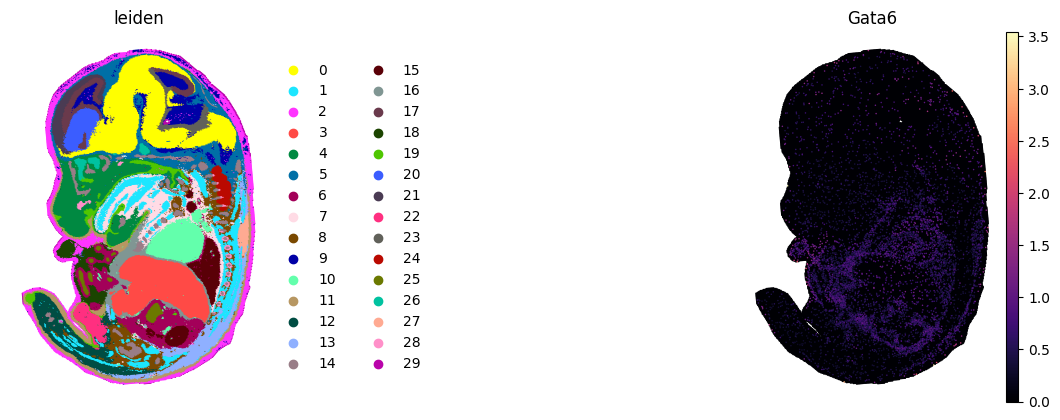

In [ ]:
sc.pl.spatial(adata_E1S2, color=["leiden", 'Gata6'], spot_size=2, color_map='magma', frameon=False)

In [ ]:
import numpy as np

In [ ]:
# Extract spatial coordinates
spatial_coords = adata_E1S2.obsm["spatial"]
spatial_coords

array([[  90.90389553, -108.33504408],
       [  91.90009023, -108.42219983],
       [  92.89628493, -108.50935557],
       ...,
       [  88.00246718, -107.07738216],
       [  88.99866188, -107.1645379 ],
       [  89.99485658, -107.25169364]])

In [ ]:
# Compute the y-coordinate midpoint
y_midpoint = np.median(spatial_coords[:, 1])  # Second column is y-coordinates
y_midpoint

-256.0464227836039

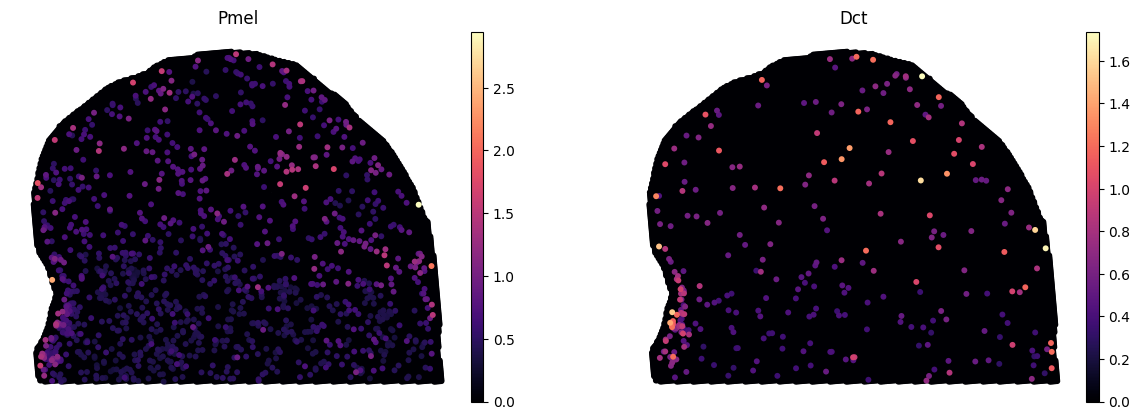

In [ ]:
# Keep only spots where the y-coordinate is above the midpoint
upper_half_mask = spatial_coords[:, 1] < y_midpoint  # Adjust sign if needed

# Create a new AnnData object with only the upper part
adata_upper = adata_E1S2[upper_half_mask].copy()

# Plot the cropped upper part
sc.pl.spatial(adata_upper, color=["Pmel", "Dct"], spot_size=4, color_map='magma', frameon=False)


In [ ]:
adata_E1S3 = sc.read_h5ad('/home/julia/spatial_1/e14/E1S3.h5ad')

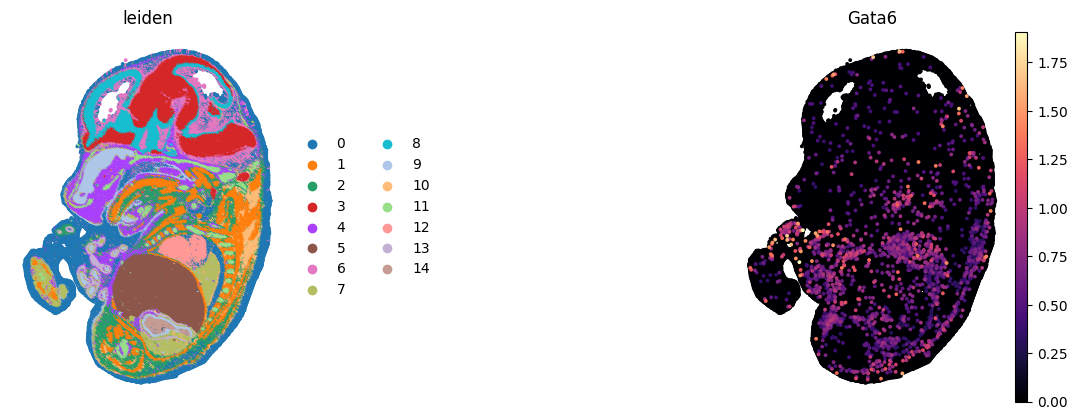

In [ ]:
sc.pl.spatial(adata_E1S3, color=["leiden", 'Gata6'], spot_size=5, color_map='magma', frameon=False)

In [ ]:
adata_E1S4 = sc.read_h5ad('/home/julia/spatial_1/e14/E1S4.h5ad')

In [ ]:
# Extract spatial coordinates
spatial_coords = adata_E1S4.obsm["spatial"]
spatial_coords

array([[-100.,  100.],
       [-101.,  100.],
       [-102.,  100.],
       ...,
       [ -97.,   99.],
       [ -98.,   99.],
       [ -99.,   99.]])

In [ ]:
# Compute the y-coordinate midpoint
y_midpoint = np.median(spatial_coords[:, 1])  # Second column is y-coordinates
y_midpoint

279.0

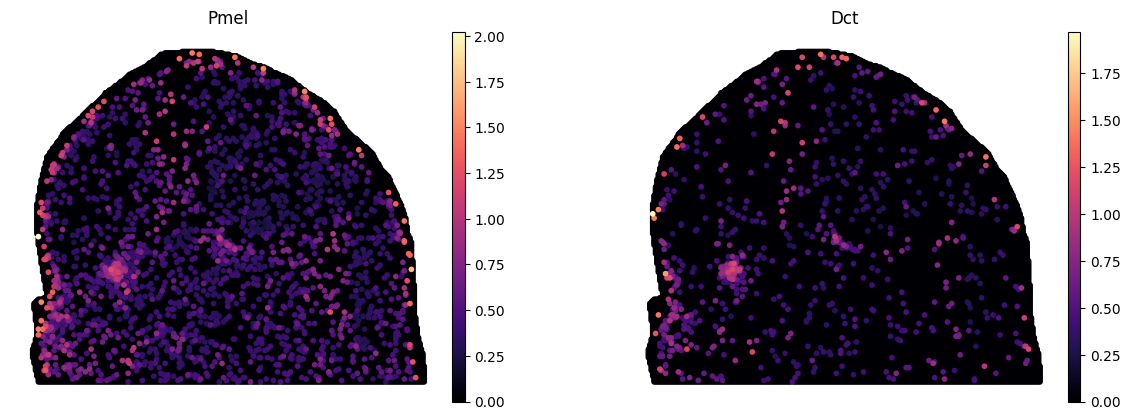

In [ ]:
# Keep only spots where the y-coordinate is above the midpoint
upper_half_mask = spatial_coords[:, 1] < y_midpoint  # Adjust sign if needed

# Create a new AnnData object with only the upper part
adata_upper = adata_E1S4[upper_half_mask].copy()

# Plot the cropped upper part
sc.pl.spatial(adata_upper, color=["Pmel", "Dct"], spot_size=4, color_map='magma', frameon=False)

In [ ]:
# Extract spatial coordinates
spatial_coords = adata_E1S4.obsm["spatial"]

# Get y-coordinate range
y_min, y_max = np.min(spatial_coords[:, 1]), np.max(spatial_coords[:, 1])

# Compute the thresholds for dividing into three parts
y_threshold_1 = y_min + (y_max - y_min) / 3  # Lower third boundary
y_threshold_2 = y_min + 2 * (y_max - y_min) / 3  # Upper third boundary

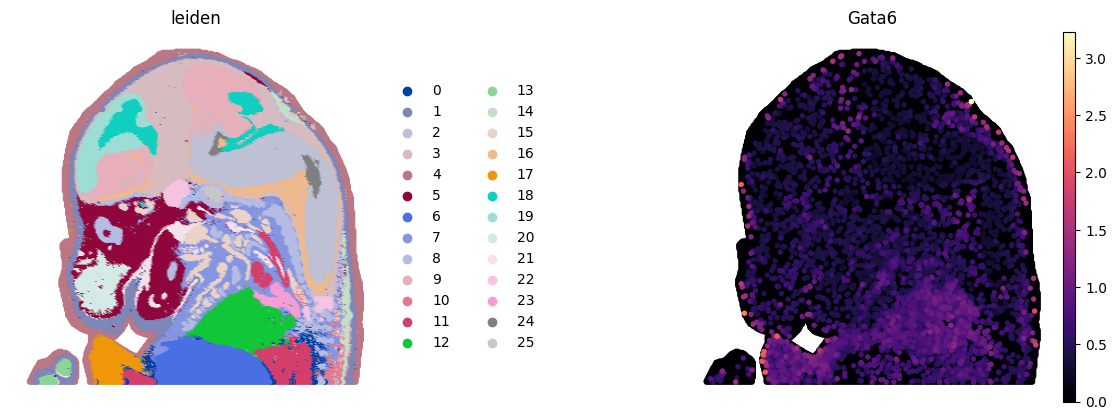

In [ ]:


# Select spots in the top two-thirds
top_two_thirds_mask = spatial_coords[:, 1] < y_threshold_2  # Keep middle and top parts

# Create a new AnnData object
adata_top_two_thirds = adata_E1S4[top_two_thirds_mask].copy()

# Plot the selected portion
sc.pl.spatial(adata_top_two_thirds, color=["leiden", "Gata6"], spot_size=5, color_map='magma', frameon=False)

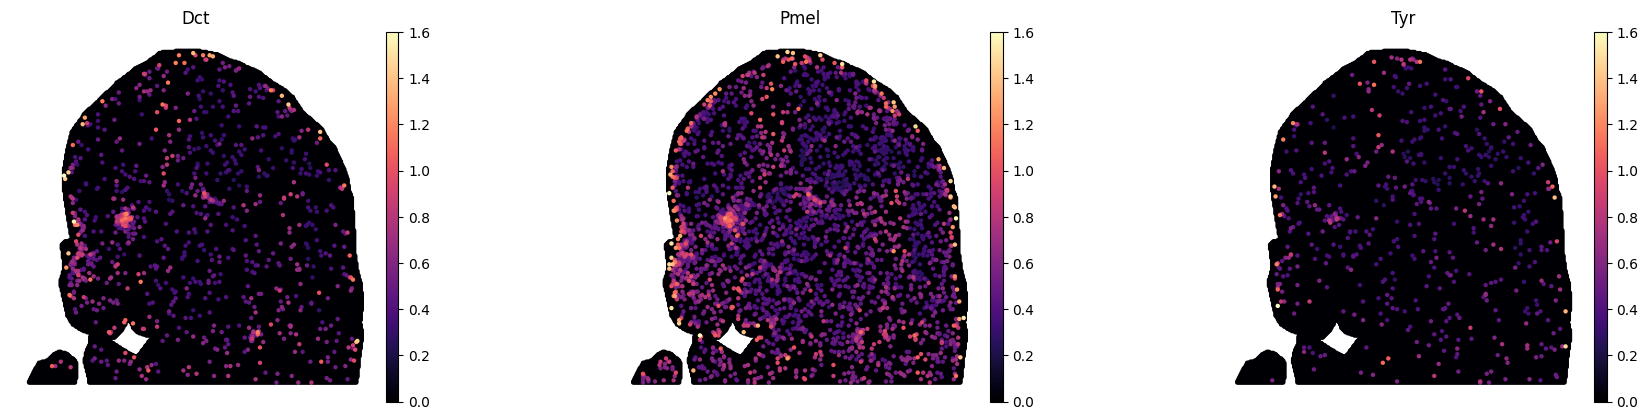

In [ ]:
sc.pl.spatial(adata_top_two_thirds, color=["Dct", "Pmel", 'Tyr'], spot_size=4, color_map='magma', frameon=False, vmax=1.6)

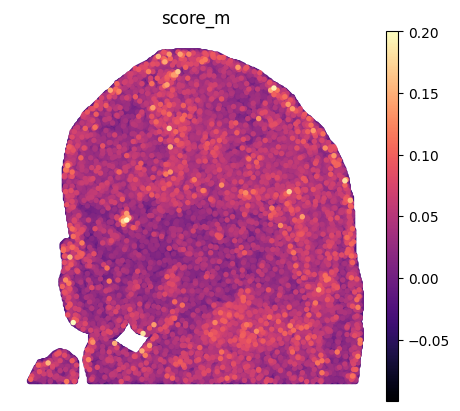

In [ ]:
melano_g = ["Gjb6", "Mlph", "Slc4a5", "Syt4", "Cited1", "Fmn1", "Gjb2", "Myo5a", "Ednrb",
         "S100b", "Mgll", "Scn8a", "Tecpr1", "Cdk2", "Mlana", "Lbh", "Cyb5a", "Syngr1", "Spp1",
         "Stmn3", "Cck", "Dkk3", "Fabp3", "Atp1a1", "Slc24a5", "Tyr", "Slc45a2", "Rab38", "Pmel",
         "Tyrp1", "Gpnmb", "Trpm1", "Gsta4", "Dct", "Neat1", "Gstp1"]
sc.tl.score_genes(adata_top_two_thirds,
                  melano_g, ctrl_size=50, gene_pool=None, n_bins=25, score_name='score_m',)
sc.pl.spatial(adata_top_two_thirds, color='score_m', spot_size=5, color_map='magma', vmax=0.2, save='score_mel.pdf',
              frameon=False)

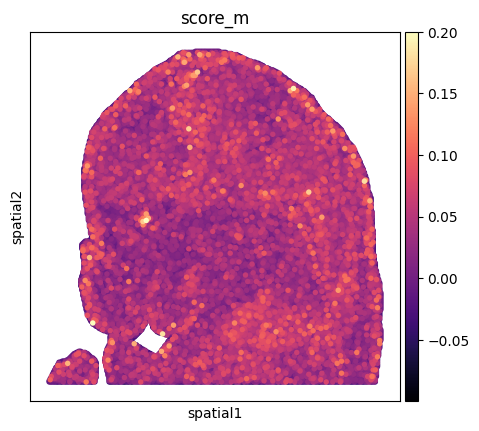

In [ ]:
sc.pl.spatial(adata_top_two_thirds, color='score_m', spot_size=4, color_map='magma', vmax=0.2)

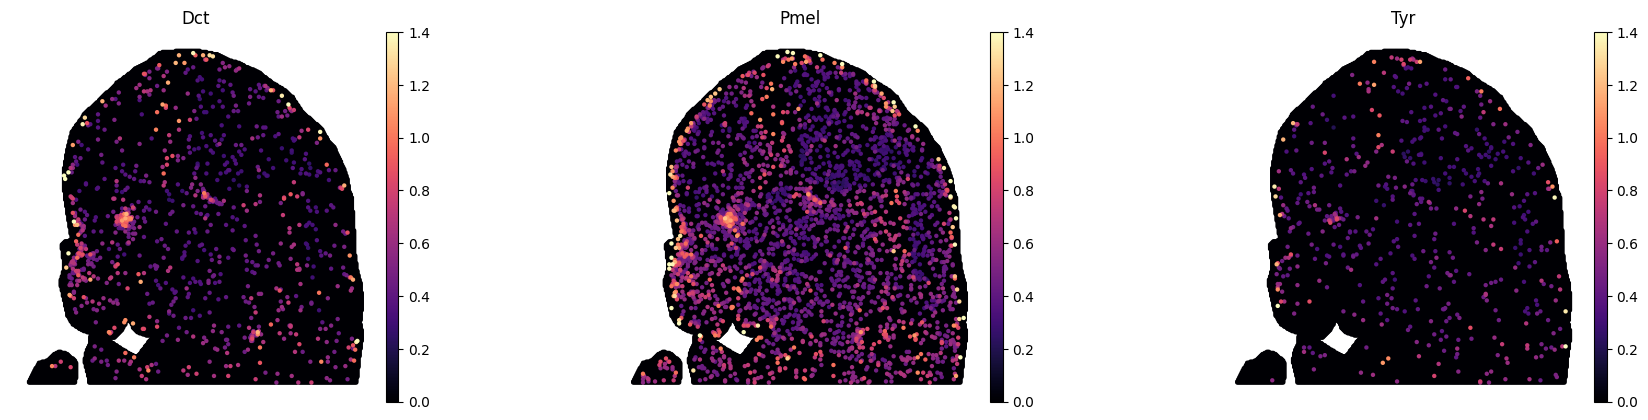

In [ ]:
sc.pl.spatial(adata_top_two_thirds, color=["Dct", "Pmel", 'Tyr'], spot_size=4, color_map='magma', frameon=False, vmax=1.4)

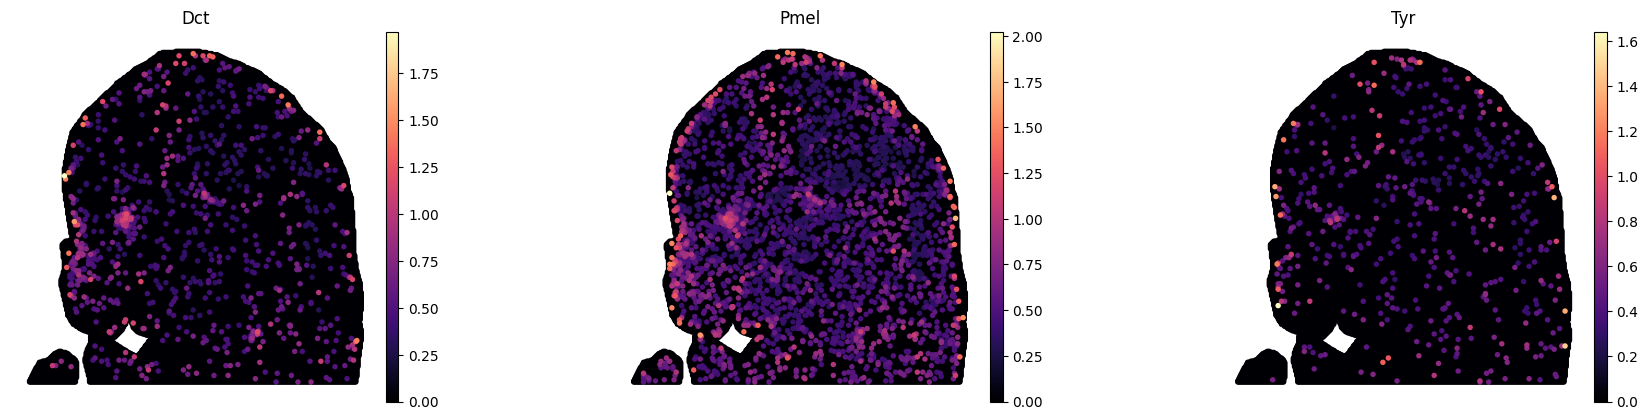

In [ ]:
sc.pl.spatial(
    adata_top_two_thirds,
    color=["Dct", "Pmel", 'Tyr'],
    spot_size=5,
    color_map='magma',
    frameon=False,
    save="spatial_plot.svg"  # Saves the file in the default Scanpy figure directory
)


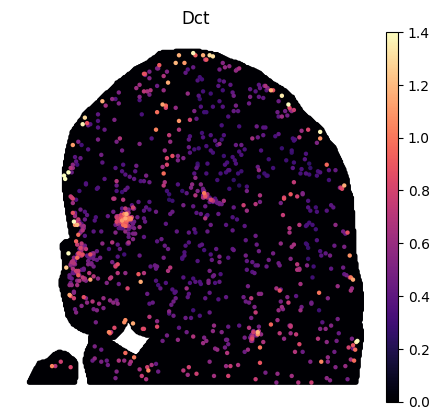

In [ ]:
sc.pl.spatial(
    adata_top_two_thirds,
    color=["Dct"],
    spot_size=4,
    color_map='magma',
    frameon=False,
    save="Dct.svg" ,
    vmax=1.4 # Saves the file in the default Scanpy figure directory
)


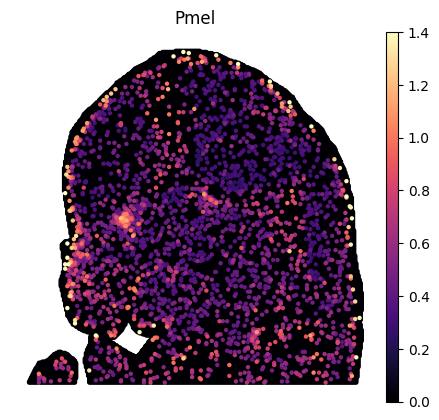

In [ ]:
sc.pl.spatial(
    adata_top_two_thirds,
    color=[ "Pmel"],
    spot_size=4,
    color_map='magma',
    frameon=False,
    save="Pmel.svg",
     vmax=1.4 # Saves the file in the default Scanpy figure directory
)


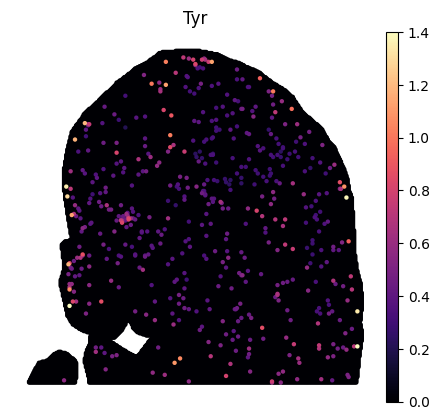

In [ ]:
sc.pl.spatial(
    adata_top_two_thirds,
    color=['Tyr'],
    spot_size=4,
    color_map='magma',
    frameon=False,
    save="Tyr.pdf" ,
     vmax=1.4 # Saves the file in the default Scanpy figure directory
)


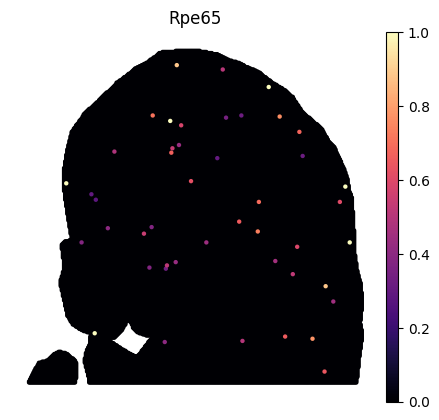

In [ ]:
sc.pl.spatial(
    adata_top_two_thirds,
    color=[ "Rpe65"],
    spot_size=4,
    color_map='magma',
    frameon=False,
   save="Pmel.p",
     vmax=1 # Saves the file in the default Scanpy figure directory
)


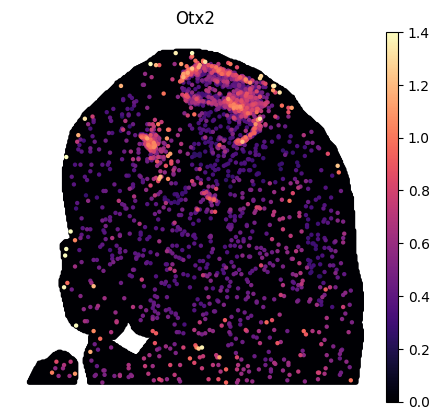

In [ ]:
sc.pl.spatial(
    adata_top_two_thirds,
    color=[ "Otx2"],
    spot_size=4,
    color_map='magma',
    frameon=False,
   # save="Pmel.svg",
     vmax=1.4 # Saves the file in the default Scanpy figure directory
)

In [ ]:
import scanpy as sc
import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax = plt.subplots(figsize=(6, 6))  # Adjust figure size as needed

# Generate the plot without immediately displaying it
sc.pl.spatial(
    adata_top_two_thirds,
    color=['Rpe65'],
    spot_size=4,
    color_map='magma',
    frameon=False,
    vmax=1,
    show=False,  # Prevents automatic display
    ax=ax
)

# Manually remove the colorbar (last axis added by Scanpy)
if len(fig.axes) > 1:  # Check if a colorbar exists
    fig.axes[-1].remove()

# Save as a clean PDF without the color scale
plt.savefig("Rpe65_no_colorbar.pdf", format="pdf", dpi=300)
plt.close()


<function matplotlib.pyplot.close(fig=None)>

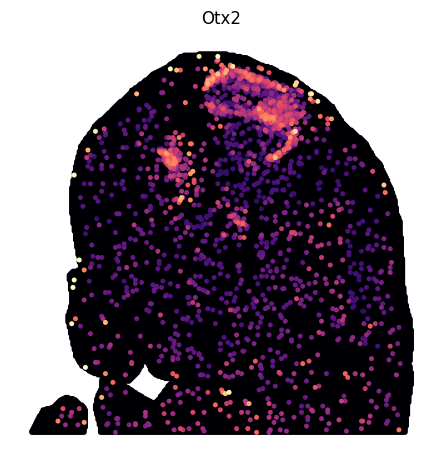

In [ ]:
import scanpy as sc
import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax = plt.subplots(figsize=(6, 6))  # Adjust figure size as needed

# Generate the plot without immediately displaying it
sc.pl.spatial(
    adata_top_two_thirds,
    color=['Otx2'],
    spot_size=4,
    color_map='magma',
    frameon=False,
    vmax=1.4,
    show=False,  # Prevents automatic display
    ax=ax
)

# Manually remove the colorbar (last axis added by Scanpy)
if len(fig.axes) > 1:  # Check if a colorbar exists
    fig.axes[-1].remove()

# Save as a clean PDF without the color scale
plt.savefig("Otx2_no_colorbar.pdf", format="pdf", dpi=300)
plt.close

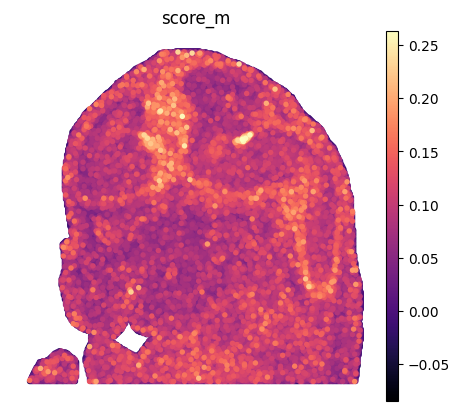

In [ ]:
### RPE
RPE_g = [ "Pon1", "Mt3", "Slc24a1", "Acsl6", "Slc1a1", "Rd3l",
               "Col4a4", "Lrat", "Tmem56", "Ermn", "Rpe65", "Slc6a13", "Rgr",
               "Ttr", "Rdh5", "Itgb8", "Slc16a8", "Cspg5", "Inpp5k", "Rlbp1",
               "Enpp2", "Abhd2", "Col9a3", "Ezr", "Arl6ip1", "Otx2", "Krt18",
               "Stra6", "Rdh10", "Atp1b1", "Trpm3", "Slc2a1", "Basp1", "Cst3",
               "Bsg", "Tmem98", "Clu", "Rbp1"]
sc.tl.score_genes(adata_top_two_thirds,
                  RPE_g, ctrl_size=50, gene_pool=None, n_bins=25, score_name='score_m',)
sc.pl.spatial(adata_top_two_thirds, color='score_m', spot_size=5, color_map='magma',
              #vmax=0.2,
              save='scoreRPE.pdf',
              frameon=False)